In [87]:
%matplotlib inline

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from matplotlib.ticker import MultipleLocator


In [89]:
# Load in csv
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [90]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [91]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [92]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [93]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [94]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [95]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [96]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [97]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [98]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [99]:
sum(city_data_df["type"]=="Suburban")

36

In [100]:
sum(city_data_df["type"]=="Rural")

18

In [101]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [102]:
#city type data frames
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [103]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [104]:
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [105]:
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [106]:
#average fare for each city by city type
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [107]:
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [108]:
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [109]:
urban_driver_count=urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [110]:
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [111]:
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

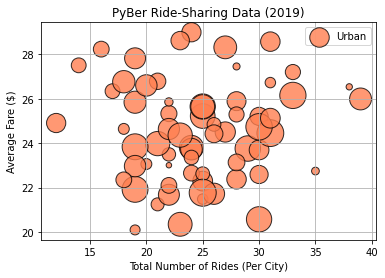

In [112]:
#urban cities plot
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,
            label="Urban",color="coral",edgecolor="black",linewidths=1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid(True)

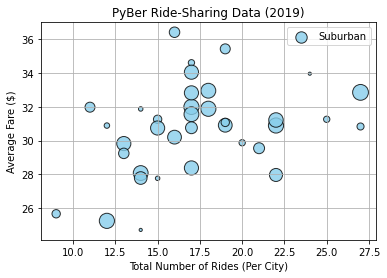

In [113]:
#suburban cities plot
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,
            label="Suburban",color="skyblue",edgecolor="black",linewidths=1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid(True)

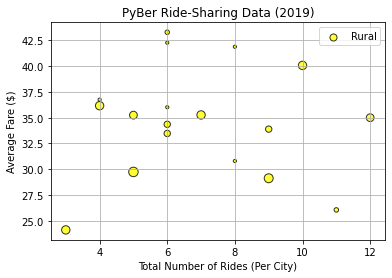

In [114]:
#rural cities plot
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,
            label="Rural",color="yellow",edgecolor="black",linewidths=1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid(True)

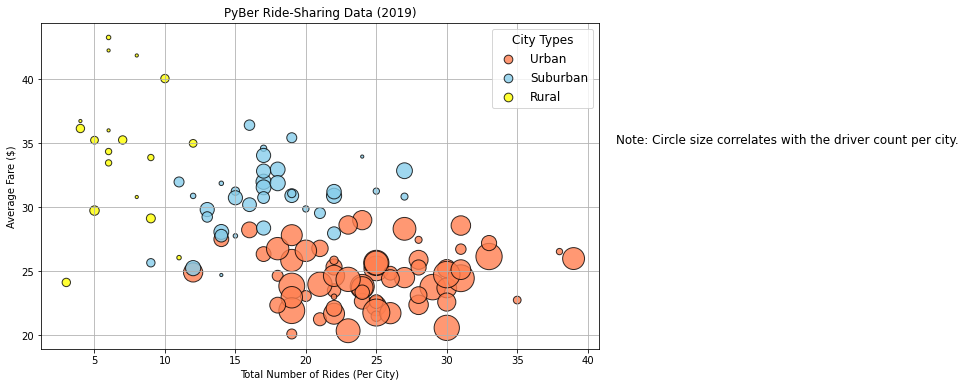

In [129]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,
            label="Urban",color="coral",edgecolor="black",linewidths=1,alpha=0.8)
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,
            label="Suburban",color="skyblue",edgecolor="black",linewidths=1,alpha=0.8)
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,
            label="Rural",color="yellow",edgecolor="black",linewidths=1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#create a legend
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#incorporate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with the driver count per city.",fontsize=12)
# Save the figure.
plt.savefig("Analysis/Fig1.png")
plt.show()